In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [58]:
pd_flats = pd.read_csv('shuffled_flats_data.csv', sep=';', header=0)

In [59]:
pd_flats

,ID,Link,Price,Rooms,Views,Square,Live Square,Kitchen,Floor,Total Floors,...,Toilet,Balcony,Repair,Window View,Ceiling,House Type,House Year,Lifts,Parking,Gas
0,246884126,https://krasnodar.cian.ru/sale/flat/246884126/,6500000,1,191,64.0,30.0,14.0,12,16,...,1 совмещенный,1 лоджия,Дизайнерский,NaN,NaN,Кирпичный,NaN,"1 пасс., 1 груз.",NaN,NaN
1,255563229,https://krasnodar.cian.ru/sale/flat/255563229/,2500000,1,6,33.0,16.6,8.2,3,8,...,1 совмещенный,1 лоджия,Евроремонт,На улицу,"2,75 м",Кирпичный,2020.0,NaN,NaN,NaN
2,256823292,https://krasnodar.cian.ru/sale/flat/256823292/,3500000,1,81,41.0,NaN,10.4,16,18,...,1 совмещенный,1 лоджия,Евроремонт,На улицу,NaN,Кирпичный,2017.0,2 пасс.,NaN,NaN
3,256729516,https://krasnodar.cian.ru/sale/flat/256729516/,2575000,1,36,30.1,16.9,6.4,5,5,...,1 совмещенный,1 балкон,Евроремонт,На улицу,"2,5 м",NaN,1973.0,NaN,NaN,Автономное
4,253172895,https://krasnodar.cian.ru/sale/flat/253172895/,11900000,3,54,118.6,66.3,17.2,10,18,...,NaN,NaN,Без ремонта,NaN,"2,9 м",Монолитно кирпичный,2020.0,"1 пасс., 1 груз.",Наземная,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,256542238,https://krasnodar.cian.ru/sale/flat/256542238/,5800000,3,33,68.3,41.8,7.7,8,12,...,1 раздельный,"1 балкон, 1 лоджия",Без ремонта,Во двор,"2,5 м",Панельный,1988.0,Есть,NaN,Центральное
5479,255196700,https://krasnodar.cian.ru/sale/flat/255196700/,1550000,0,19,20.0,8.0,4.0,2,5,...,1 совмещенный,NaN,Без ремонта,На улицу,"2,8 м",Монолитный,2021.0,Есть,Наземная,NaN
5480,257013767,https://krasnodar.cian.ru/sale/flat/257013767/,1700000,0,2,27.2,18.0,4.0,2,5,...,1 совмещенный,NaN,Косметический,Во двор,NaN,Кирпичный,2020.0,NaN,Наземная,NaN
5481,256616609,https://krasnodar.cian.ru/sale/flat/256616609/,2270000,0,41,25.0,NaN,NaN,7,9,...,1 совмещенный,1 балкон,Дизайнерский,На улицу и двор,NaN,Монолитный,2017.0,Есть,NaN,NaN


In [60]:
total = pd_flats.isnull().sum().sort_values(ascending=False)
percent = (pd_flats.isnull().sum() / pd_flats.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
District 2,5046,0.920299
Gas,4787,0.873062
Parking,4309,0.785884
Ceiling,3824,0.697428
Window View,3103,0.565931
House Year,2387,0.435346
Lifts,1894,0.345431
District,1821,0.332117
Toilet,1735,0.316433
Balcony,1524,0.277950


In [61]:
pd_flats = pd_flats.drop((missing_data[missing_data['Percent'] > 0.5]).index, 1)
pd_flats = pd_flats.drop([
    'ID', 
    'Link', 
    'Live Square', 
    'Kitchen', 
    'House Year', 
    'Description',
    'Area',
    'Street',
    'Flat number',
    'Views'
], axis=1)

In [62]:
total = pd_flats.isnull().sum().sort_values(ascending=False)
percent = (pd_flats.isnull().sum() / pd_flats.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Lifts,1894,0.345431
District,1821,0.332117
Toilet,1735,0.316433
Balcony,1524,0.277950
House Type,1092,0.199161
Repair,481,0.087726
Flat Type,0,0.000000
Total Floors,0,0.000000
Floor,0,0.000000
Square,0,0.000000


In [63]:
pd_flats['Repair'] = pd_flats['Repair'].fillna('Без ремонта')
pd_flats['House Type'] = pd_flats['House Type'].fillna('Монолитно кирпичный')
pd_flats['Balcony'] = pd_flats['Balcony'].fillna('1 балкон')
pd_flats['Toilet'] = pd_flats['Toilet'].fillna('1 совмещенный')
pd_flats['District'] = pd_flats['District'].fillna('No info')
pd_flats['Lifts'] = pd_flats['Lifts'].fillna('Нет')

In [64]:
pd_flats.isnull().sum().max()

0

In [65]:
print(*['{} {}'.format(feature, pd_flats[feature].dtype) for feature in pd_flats.keys()], sep='\n')

Price int64
Rooms int64
Square float64
Floor int64
Total Floors int64
District object
Flat Type object
Toilet object
Balcony object
Repair object
House Type object
Lifts object


In [66]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['District', 'Flat Type', 'Toilet', 'Balcony', 'Repair', 'House Type', 'Lifts']
label_encoders = {}

for categorical in categorical_features:
    label = LabelEncoder()
    label.fit(list(pd_flats[categorical].values))
    label_encoders[categorical] = label
    pd_flats[categorical] = label.transform(list(pd_flats[categorical].values))

print('Shape', pd_flats.shape)

Shape (5483, 12)


In [11]:
pd_flats.head(10)

,Price,Rooms,Square,Floor,Total Floors,District,Flat Type,Toilet,Balcony,Repair,House Type,Lifts
0,6500000,1,64.0,12,16,45,0,1,4,1,3,0
1,2500000,1,33.0,3,8,35,0,1,4,2,3,33
2,3500000,1,41.0,16,18,21,0,1,4,2,3,12
3,2575000,1,30.1,5,5,45,0,1,0,2,4,33
4,11900000,3,118.6,10,18,0,0,1,0,0,4,0
5,5900000,3,80.0,3,16,20,0,0,0,3,5,33
6,9000000,1,62.0,20,22,47,0,1,4,0,5,0
7,2520000,0,21.0,8,9,37,0,1,0,1,4,0
8,4500000,3,62.0,8,16,39,0,1,0,2,5,27
9,2600000,1,45.0,3,3,0,0,0,0,3,5,33


In [12]:
pd_flats = pd_flats.drop(pd_flats[(pd_flats['Square']>400) | (pd_flats['Price']>50000000)].index)
pd_flats = pd_flats.drop(pd_flats[(pd_flats['Square']<50) & (pd_flats['Price']>10000000)].index)

In [13]:
np_flats = pd_flats.to_numpy()

In [14]:
np_flats[:10]

array([[6.500e+06, 1.000e+00, 6.400e+01, 1.200e+01, 1.600e+01, 4.500e+01,
        0.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 0.000e+00],
       [2.500e+06, 1.000e+00, 3.300e+01, 3.000e+00, 8.000e+00, 3.500e+01,
        0.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 3.300e+01],
       [3.500e+06, 1.000e+00, 4.100e+01, 1.600e+01, 1.800e+01, 2.100e+01,
        0.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 1.200e+01],
       [2.575e+06, 1.000e+00, 3.010e+01, 5.000e+00, 5.000e+00, 4.500e+01,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 3.300e+01],
       [1.190e+07, 3.000e+00, 1.186e+02, 1.000e+01, 1.800e+01, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00],
       [5.900e+06, 3.000e+00, 8.000e+01, 3.000e+00, 1.600e+01, 2.000e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 5.000e+00, 3.300e+01],
       [9.000e+06, 1.000e+00, 6.200e+01, 2.000e+01, 2.200e+01, 4.700e+01,
        0.000e+00, 1.000e+00, 4.

In [15]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(np_flats, test_size=0.1, random_state=123)

In [16]:
print('Data Train shape: {}\nData Test shape: {}'.format(data_train.shape, data_test.shape))

Data Train shape: (4923, 12)
Data Test shape: (547, 12)


In [17]:
y_train, X_train = data_train[:, 0], data_train[:, 1:]
y_test, X_test = data_test[:, 0], data_test[:, 1:]

In [18]:
mean = X_train.mean(axis=0)
X_train -= mean
X_test -= mean
std = X_train.std(axis=0)
X_train /= std
X_test /= std

In [19]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=123)

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001, 0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001, 0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [21]:
history = model.fit(X_tr, y_tr, epochs=100, batch_size=16, verbose=0, validation_data=(X_val, y_val))
val_mse_score, val_mae_score = model.evaluate(X_val, y_val)

16/16 [==============================] - 0s 1ms/step - loss: 3712318963712.0000 - mae: 1035317.6875


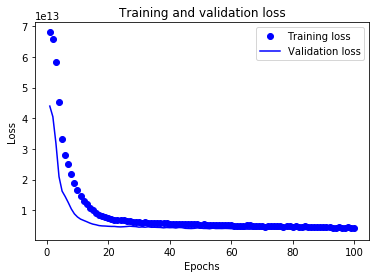

In [22]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['mae']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [23]:
val_mae_score

1035317.6875

In [24]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 3841313996800.0000 - mae: 1089498.3750


In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred.shape

(547, 1)

In [41]:
counter = 0
error_percents = []
for y_pr, y_real in zip(y_pred, y_test):
    y_pr = y_pr[0]
    e = y_pr - y_real
    err_percent = 100 * e / y_real
    error_percents.append(abs(err_percent))

error_percents = np.array(error_percents)

Text(0.5, 0, 'Data')

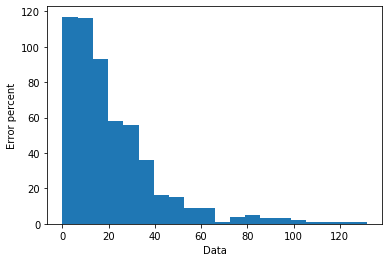

In [42]:
plt.hist(error_percents, bins=20)
plt.ylabel('Error percent')
plt.xlabel('Data')

In [43]:
err_pd = pd.DataFrame(error_percents)
err_pd.describe()

,0
count,547.000000
mean,21.634098
std,20.483007
min,0.019688
25%,7.565361
50%,15.993728
75%,29.440632
max,131.703235


In [45]:
pd_flats.keys()

Index(['Price', 'Rooms', 'Square', 'Floor', 'Total Floors', 'District',
       'Flat Type', 'Toilet', 'Balcony', 'Repair', 'House Type', 'Lifts'],
      dtype='object')

In [102]:
def flat_input():
    row = []
    for key in pd_flats.keys()[1:]:
        element = input('{}: '.format(key))
        if key in ('Rooms', 'Square', 'Floor', 'Total Floors'):
            element = float(element)
        else:
            # print(label_encoders[key].classes_)
            element = label_encoders[key].transform([element])[0]
        row.append(element)
        
    return row

In [121]:
flat_example = flat_input()

Rooms: 3
Square: 81.4
Floor: 3
Total Floors: 12
District: мкр. Московский
Flat Type: Вторичка
Toilet: 1 раздельный
Balcony: 3 балкона, 3 лоджии
Repair: Косметический
House Type: Панельный
Lifts: 1 пасс., 1 груз.


In [122]:
flat_example

[3.0, 81.4, 3.0, 12.0, 33, 0, 0, 10, 3, 6, 0]

In [123]:
flat_ex_n = np.array([flat_example, ])

In [124]:
flat_ex_n -= mean
flat_ex_n /= std
print(flat_ex_n)


[[ 0.92243112  0.40713869 -0.85961839 -0.27636953  0.50083245 -0.09780954
  -0.75900792  3.12821264  1.513829    1.7284445  -1.42410897]]


In [125]:
model.predict(flat_ex_n)[0][0]

5546166.0

In [77]:
print(label_encoders['Flat Type'].classes_)
print(label_encoders['Flat Type'].transform(['Вторичка', ]))

['Вторичка' 'Вторичка Апартаменты' 'Вторичка Пентхаус' 'Новостройка']
[0]


In [48]:
pd_flats['Flat Type']

0       0
1       0
2       0
3       0
4       0
       ..
5478    0
5479    0
5480    0
5481    0
5482    0
Name: Flat Type, Length: 5470, dtype: int64

In [85]:
X_test[0]

array([-0.76917938, -0.6688231 , -0.30075481,  0.48397874, -1.23509679,
       -0.09780954, -0.10984253, -0.80904533, -0.92298196,  0.83359412,
        0.94815019])

In [91]:
model.predict(np.array([X_test[0], ]))

array([[2769385.8]], dtype=float32)